=== Gini Tree ===
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

=== Entropy Tree ===
Accuracy: 0.956140350877193
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



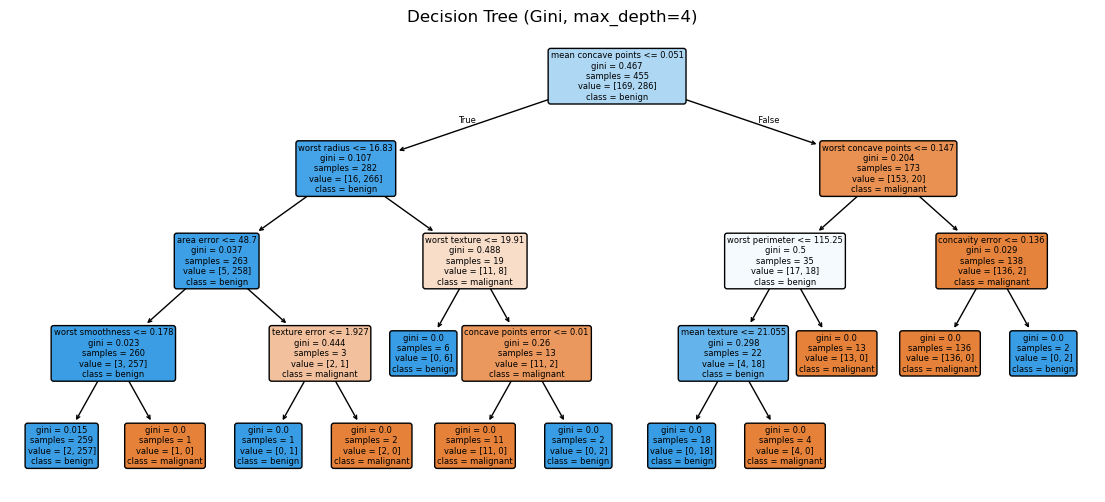

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1) Decision tree with Gini (CART-style)
dt_gini = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)
dt_gini.fit(X_train, y_train)

# 2) Decision tree with Entropy (information gain / ID3-style)
dt_entropy = DecisionTreeClassifier(
    criterion="entropy",   # uses Shannon entropy
    max_depth=4,
    random_state=42
)
dt_entropy.fit(X_train, y_train)

# Predictions
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

# Metrics
print("=== Gini Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini, target_names=data.target_names))

print("=== Entropy Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy, target_names=data.target_names))

# Optional: visualize one of the trees
plt.figure(figsize=(14, 6))
tree.plot_tree(
    dt_gini,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    fontsize=6
)
plt.title("Decision Tree (Gini, max_depth=4)")
plt.show()
